# Changing Colorspaces

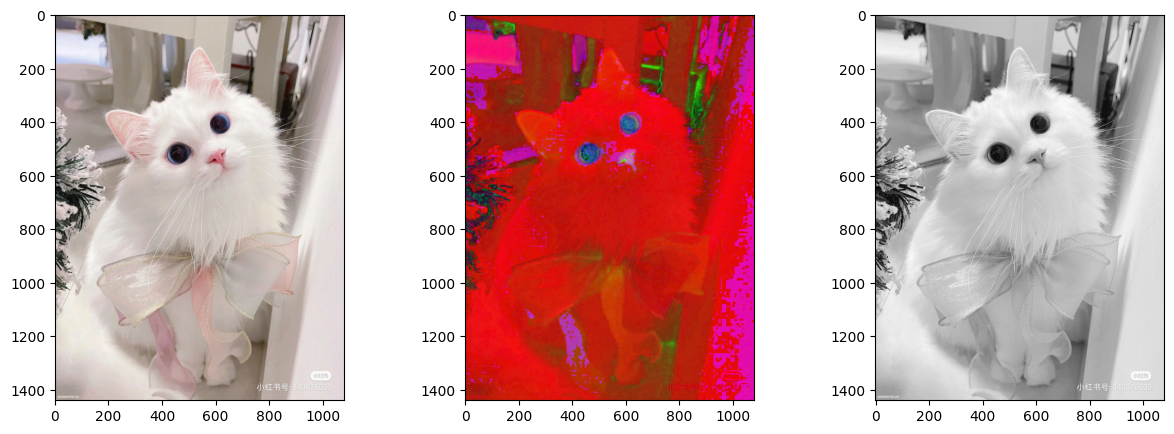

In [39]:
# Changing Color-space
# For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
# For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. 
# For BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV. 

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.jpg')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB))

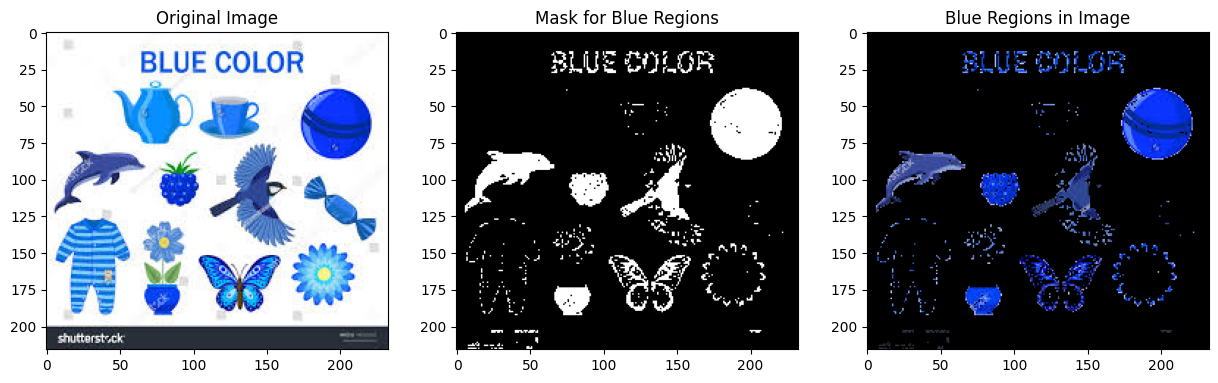

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('blue_image.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Định nghĩa phạm vi màu xanh lam trong không gian màu HSV
# Hue khoảng từ 110-130, Saturation và Value có thể tùy chỉnh theo nhu cầu
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tạo mặt nạ để chỉ chứa các vùng màu xanh lam của image_hsv
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Áp dụng mặt nạ lên hình ảnh gốc để chỉ hiển thị khu vực màu xanh lam
blue_regions = cv2.bitwise_and(image, image, mask=mask)

# Hiển thị ảnh gốc và ảnh chỉ chứa vùng màu xanh lam
plt.figure(figsize=[15, 5])

# Hiển thị ảnh gốc
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Hiển thị mặt nạ
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title("Mask for Blue Regions")

# Hiển thị ảnh với chỉ vùng màu xanh lam
plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_regions, cv2.COLOR_BGR2RGB))
plt.title("Blue Regions in Image")

plt.show()

In [41]:
# xác định phạm vi màu trong không gian HSV
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

# lấy [H-10, 100,100] và [H+10, 255, 255] như giới hạn dưới và giới hạn trên

[[[120 255 255]]]


# Image Thresholding
Image Thresholding là một kỹ thuật xử lý ảnh nhằm phân đoạn hình ảnh thành các vùng dựa trên độ sáng của pixel. Ý tưởng chính là chọn một giá trị ngưỡng (threshold value) và gán một giá trị mới cho các pixel dựa trên việc chúng có lớn hơn hay nhỏ hơn giá trị ngưỡng đó.

Các kỹ thuật thresholding thường được sử dụng để phân biệt đối tượng (foreground) khỏi nền (background) trong các hình ảnh grayscale.

Các loại Thresholding cơ bản
1. Simple Thresholding: Đơn giản nhất là chọn một giá trị ngưỡng cố định. Pixel nào có giá trị lớn hơn ngưỡng sẽ được gán một giá trị mới (thường là màu trắng - 255), còn lại sẽ được gán màu đen (0).
2. Adaptive Thresholding: Khi hình ảnh có các vùng sáng tối không đồng đều, adaptive thresholding giúp chọn giá trị ngưỡng khác nhau cho các phần nhỏ của ảnh dựa trên các tính toán cục bộ (local).
3. Otsu's Binarization: Đây là phương pháp tự động tìm ra giá trị ngưỡng tối ưu để phân đoạn ảnh, đặc biệt hữu ích khi histogram của ảnh có 2 đỉnh (ảnh có hai vùng sáng và tối rõ rệt).

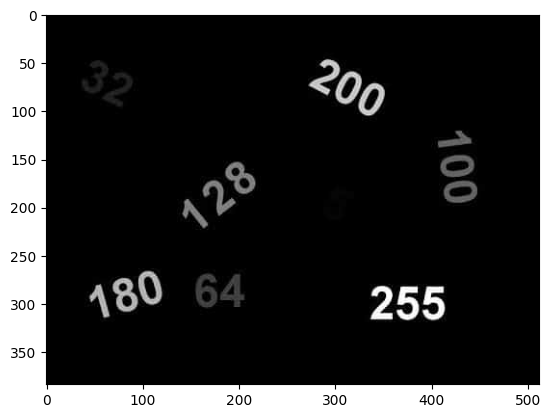

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('thresh_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [43]:
print(image.shape)

(384, 512, 3)


Ngưỡng nhị phân


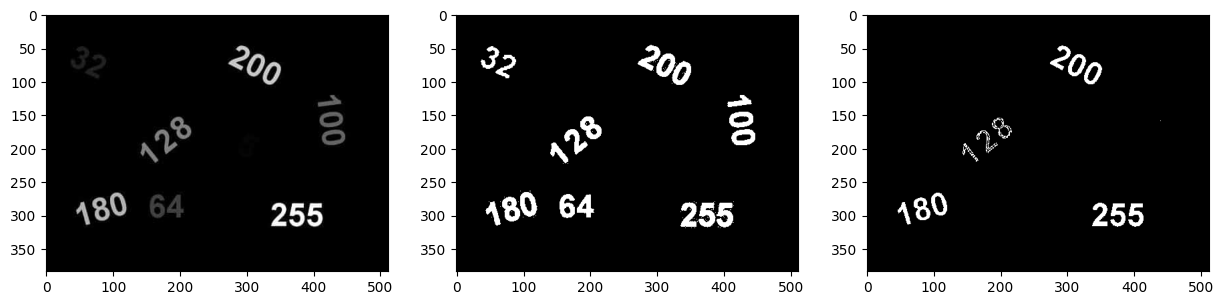

In [44]:
# if src(x,y) > thresh -->  dst(x,y) = maxValue
# else -->  dst(x,y) = 0

thresh_0 = 20
maxValue = 255
_, dst_0_255 = cv2.threshold(image, thresh_0, maxValue, cv2.THRESH_BINARY)

thresh_128 = 128
_, dst_128_255 = cv2.threshold(image, thresh_128, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(dst_0_255, cmap='gray')
plt.subplot(133)
plt.imshow(dst_128_255, cmap='gray')

plt.show()

Ngưỡng nhị phân nghịch đảo


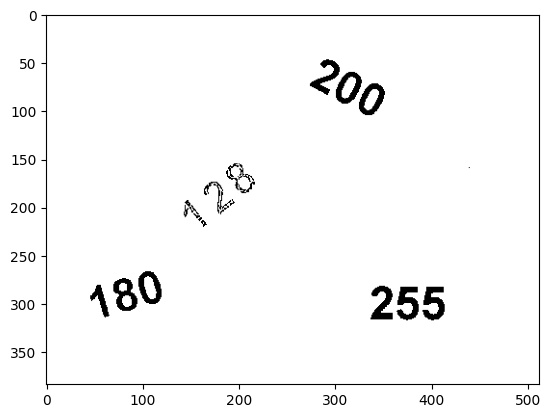

In [45]:
thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')

Ngưỡng cắt bớt ( THRESH_TRUNC )


127.0


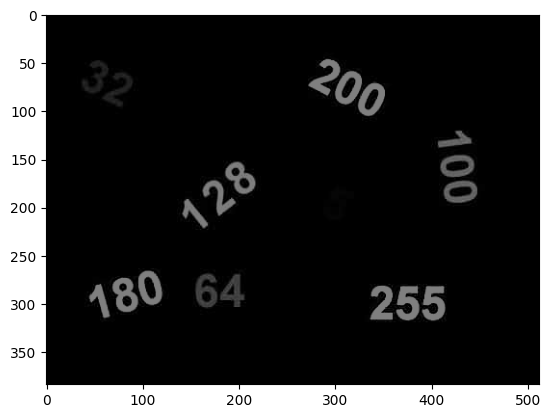

In [46]:
# if src(x,y) > thresh
#   dst(x,y) = thresh
# else
#   dst(x,y) = src(x,y)
# Trên ngưỡng thì đưa về ngưỡng, dưới ngưỡng thì giữ nguyên

thresh = 127
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TRUNC)
print(th)
plt.imshow(dst, cmap='gray')

Ngưỡng về 0 ( THRESH_TOZERO )


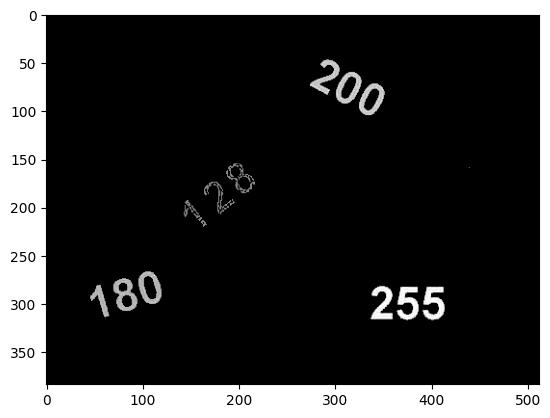

In [47]:
# if src(x,y) > thresh
#   dst(x,y) = src(x,y)
# else
#   dst(x,y) = 0
# Trên ngưỡng thì giữ nguyên, dưới ngưỡng thì về 0

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO)
plt.imshow(dst, cmap='gray')

Ngưỡng đảo ngược về 0 ( THRESH_TOZERO_INV )


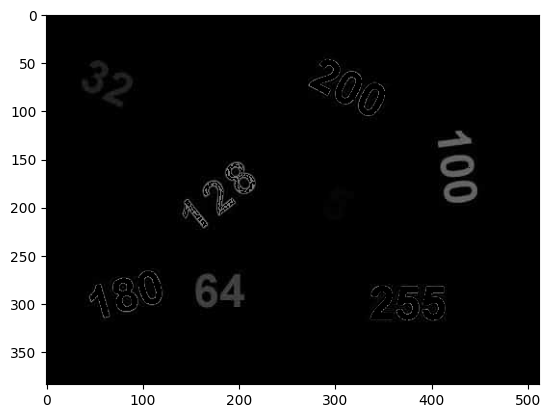

In [48]:
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = src(x,y)
# Trên ngưỡng thì về 0, dưới ngưỡng thì giữ nguyên

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO_INV)
plt.imshow(dst, cmap='gray')

Ngưỡng thích ứng


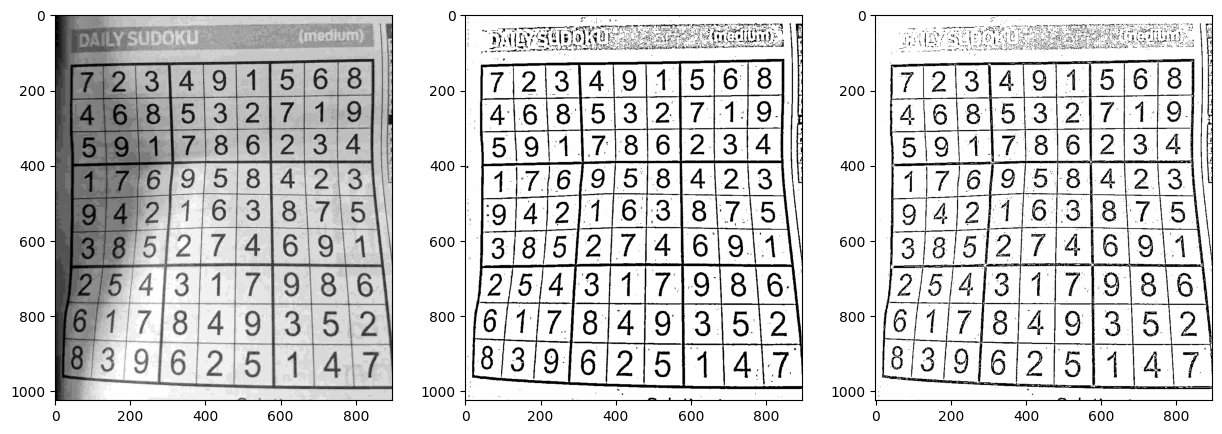

In [54]:
# Thuật toán tính ngưỡng sẽ tính giá trị ngưỡng cho mỗi pixel hoặc mỗi vùng nhỏ, tức là trong cùng một ảnh sẽ có giá trị ngưỡng khác nhau cho 
# các vùng/pixel khác nhau. Và nó mang lại hiệu quả tốt cho những ảnh có nhiều độ sáng khác nhau.
#
# Adaptive Method - It decides how thresholding value is calculated.
#     --> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.    
#     --> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
#
# Block Size - It decides the size of neighbourhood area 
# 
# C - It is just a constant which is subtracted from the mean or weighted mean caculate

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

blockSize = 15

C = 15

image_median = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
image_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image_median, cmap='gray')
plt.subplot(133)
plt.imshow(image_gauss, cmap='gray')

plt.show()

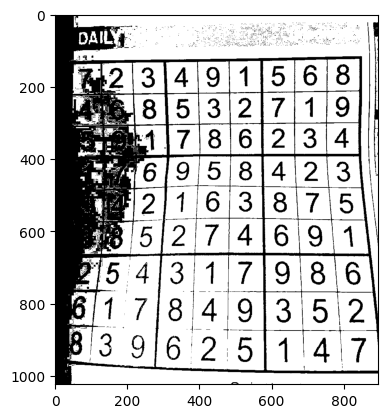

In [50]:
_, dst = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')

Ngưỡng Otsu

Ngưỡng Otsu hoạt động dựa trên nguyên tắc tối ưu hóa giữa các lớp (inter-class variance) của mức xám trong ảnh. Mục tiêu là tìm ra một ngưỡng giá trị 𝑡 mà tại đó độ lệch giữa các lớp (foreground và background) là lớn nhất. Cách thực hiện cụ thể như sau:

1. Tính Histogram: Tạo một histogram của ảnh, thể hiện tần số xuất hiện của các mức xám từ 0 đến 255.

2. Tính Xác Suất Tích Lũy: Xác định xác suất tích lũy và giá trị trung bình tích lũy cho mỗi mức xám.

3. Tính Độ Lệch Giữa Các Lớp: Sử dụng các giá trị xác suất và trung bình tích lũy để tính toán độ lệch giữa các lớp cho mỗi ngưỡng giá trị 𝑡.

4. Chọn Ngưỡng Tối Ưu: Tìm giá trị ngưỡng 𝑡 mà tại đó độ lệch giữa các lớp là lớn nhất.

Xác suất tích lũy tại mức xám k theo công thức P(k) = ∑(i=0 -> k) H(i) / N trong đó n là tổng số pixel

Giá trị trung bình tích lũy tại mức xám k theo công thức μ(k) = ∑(i=0 -> k) i * H(i) / N

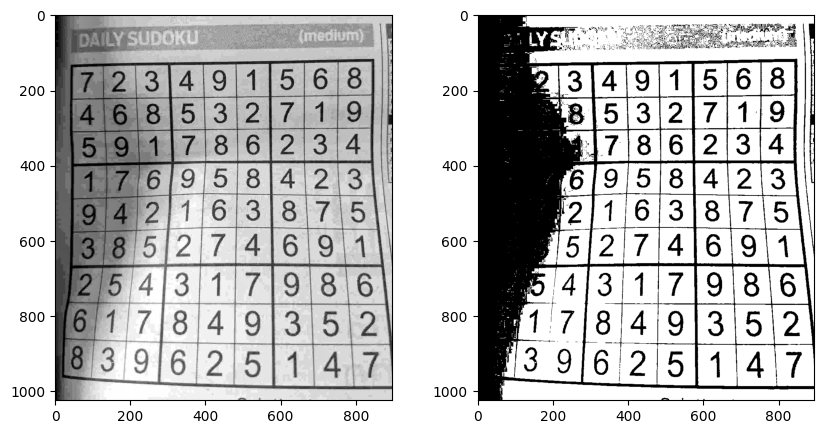

In [59]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng Otsu
# Lưu ý rằng nên truyền giá trị ngưỡng ban đầu bằng 0
# và chỉ định loại phân ngưỡng bằng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

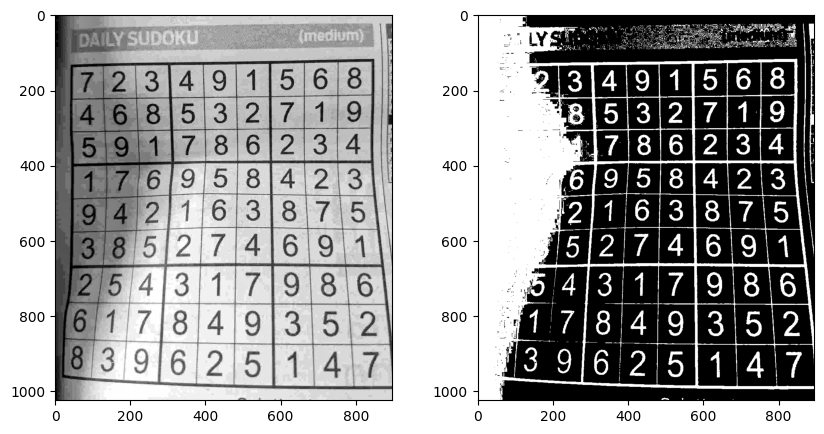

In [58]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng Otsu
# Lưu ý rằng nên truyền giá trị ngưỡng ban đầu bằng 0
# và chỉ định loại phân ngưỡng bằng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()